# Homework 1: Linear regression

## Exercise 2

In this exercise, we demonstrate OLS linear regression on a second order polynomial with normally distributed stochastic noise.

In [2]:
import numpy as np, matplotlib.pyplot as plt, random
from sklearn.linear_model import LinearRegression, r2_score as r2

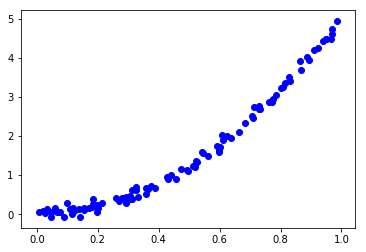

In [33]:
# initializing data and constructing functions
np.random.seed(42)
polynomial = lambda x, noise_coeff: 5*x**2 + 0.1*np.random.randn(100, 1) # true function + noise
x = np.random.rand(100, 1)

def MSE(y, y_pred):
    '''
    The MSE method is tested against the Scikit-Learn implementation, 
    and only returns the calculated value if the two results agree.
    '''
    from sklearn.metrics import mean_squared_error
    
    n = float(y[:, 0].shape[0])
    score = np.sum((y-y_pred)**2)/n
    sk_MSE = mean_squared_error(y, y_pred)
    
    if np.abs(score - sk_MSE) < 1e-4:
        return score
    else:
        return 'Incorrect MSE calculation'

def R2(y, y_pred):
    '''
    The R2 method is tested against the Scikit-Learn implementation, 
    and only returns the calculated value if the two results agree.
    '''
    from sklearn.metrics import r2_score
    
    def R2(y, y_pred):
    y_mean = np.mean(y)
    SS_res = np.sum((y-y_pred)**2)
    SS_reg = np.sum((y-y_mean)**2)
    score = 1 - SS_res/SS_reg
    sk_R2 = r2_score(y, y_pred)
    
    if np.abs(score - sk_R2) < 1e-4:
        return score
    else:
        return 'Incorrect R2 calculation'


def OLS_compare(choice, noise_coeff):
    y = polynomial(x, noise_coeff)
    plt.scatter(x, y, color='b')
    plt.show() # plot raw data
    

X = np.stack((x**0, x**1, x**2), axis=1)[:, :, 0] #Design matrix

## OLS regression

As shown in the lecture notes, the regression coefficients are found by
\begin{equation}
\pmb{\beta} = \left( \pmb{X}^T \pmb{X}\right)^{-1}\pmb{X}^T\pmb{y},
\end{equation}
and we find the fitted function by
\begin{equation}
\tilde{\pmb{y}} = \pmb{X \beta}
\end{equation}

In [4]:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
print (beta.shape)
ynew = X.dot(beta)
print ('Polynomial coefficients \n', beta)

(3, 1)
Polynomial coefficients 
 [[ 0.05614027]
 [-0.27222412]
 [ 5.23242548]]


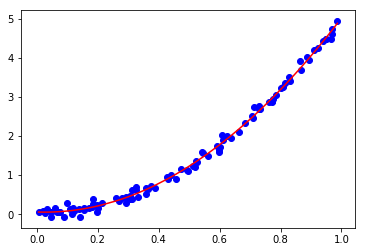

In [32]:
plt.scatter(x, y, color='b')
i = np.argsort(x[:, 0])
x_sort = x[i, 0]
y_sort = ynew[i, 0]
plt.plot(x_sort, y_sort, color='r')
plt.show()


The Scikit-learn library has a neat function for performing the regression:  

In [14]:

reg = LinearRegression().fit(X, y)
beta_sk = reg.coef_.T
print (beta_sk)
y_sk = X.dot(beta_sk)

[[ 0.        ]
 [-0.27222412]
 [ 5.23242548]]


We see that the first and second order coefficients are the same in both methods and that both models produce a first order coefficient, but the Scikit-Learn algorithm manages to correctly fit a model without a constant term. 

In [7]:
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
mse_sk = mse(y, y_sk)
mse_ynew = mse(y, ynew)
print (mse_sk, mse_ynew)

0.010923666779281693 0.007771936663502366


In [8]:
def MSE(y, y_pred):
    n = float(y[:, 0].shape[0])
    return np.sum((y-y_pred)**2)/n
MSE_sk = MSE(y, y_sk)
MSE_ynew = MSE(y, ynew)
print (MSE_sk, MSE_ynew)

0.010923666779281693 0.007771936663502366


Despite the fact that the coefficients produced by the scikit algorithm is algebraically more similar to the true function, the mean squared error is larger than for the direcly implemented least square algorithm.

In [9]:
r2_sk = r2(y, y_sk)
r2_ynew = r2(y, ynew)
print (mse_sk, mse_ynew, '\n' , )

0.010923666779281693 0.007771936663502366


In [29]:
def R2(y, y_pred):
    y_mean = np.mean(y)
    SS_res = np.sum((y-y_pred)**2)
    SS_reg = np.sum((y-y_mean)**2)
    return 1 - SS_res/SS_reg
print (' Direct R2: \n Homebrew:', R2(y, ynew),'\n Scikit-learn:',R2(y, y_sk), '\n')
print (' Scikit-Learn R2: \n Homebrew:', r2(y, ynew), '\n Scikit-Learn:', R2(y, y_sk))

 Direct R2: 
 Homebrew: 0.9964562915831219 
 Scikit-learn: 0.9950192221598126 

 Scikit-Learn R2: 
 Homebrew: 0.9964562915831219 
 Scikit-Learn: 0.9950192221598126


The R2 score-algorithm yields the same results as the Scikit learn implementation. The difference in R2 scores are negligible, and both are quite close to one, so the goodness of the directly implemented fit is comparable to the the Scikit-Learn method. Both the R2 and MSE scores are in fact a tiny bit better for the direct implementation. The source of this slight difference is unkown to me as I haven't studied the code in the Sckit-Learn Package, which I assume to be outside of the scope of the exercise.